<a href="https://colab.research.google.com/github/FVaisfeld/ml/blob/main/data_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Check for bias between chinese and our data

In this lab, I will check if we need to do some fine tuning or if we can just use the chinese data for training an arrythia model on out data. 



In [ ]:
# Install this package to use Colab's GPU for training
#!apt install --allow-change-held-packages libcudnn8=8.4.1.50-1+cuda11.6

Run the code below to load the dataset `Chinese_Cardisio_Combined.mat` 




---



Check the personal parameters... 



In [1]:
from scipy import io
import numpy as np
import pandas as pd 

age_temp = io.loadmat('Age.mat')
age = []
[age.append(float(n[0])) for n in age_temp['Age']]


sex_temp = io.loadmat('Sex.mat')
sex = {}
sex = [(str(n[0][0])) for n in sex_temp['Sex']]
print(set(sex))


labels_temp = io.loadmat('Labels.mat')
labels = []
[labels.append((n[0][0])) for n in labels_temp['Labels_temp']]
categories = set(labels)
print(str('categories: ' + str(categories)))


cardisio_measurements_temp = io.loadmat('Cardisio_measurements.mat')
cardisio_measurements = []
[cardisio_measurements.append(n) for n in cardisio_measurements_temp['Cardisio_measurements']]
[N_Cardisio, N_Features] = np.shape(cardisio_measurements)
cardisio_measurements_DF = pd.DataFrame(cardisio_measurements)
display(cardisio_measurements_DF)
print(str('Number Features: ' + str(N_Features) + ' \nNumber Measurements CARDISIO:'+ str(N_Cardisio)))


#to play with our data we'll create a copy
cardisio_measurements_DF1 = cardisio_measurements_DF.copy(deep = True)

#however passing by reference is convenient, because we can clean both datasets at once
cardisio_measurements_DF__data_cleaner = [cardisio_measurements_DF1, cardisio_measurements_DF]





{'[nan]', 'Female', 'Male'}
categories: {'PVC', 'STE', 'AF', 'STD', 'LBBB', 'NSR', 'I_AVB', 'RBBB', 'PAC'}


,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,[[-0.07851791484590447]],[[0.07925006611084448]],[[0.0845683161215345]],[[0.07360939919690408]],[[0.08850530062955053]],[[0.0750479391025292]],[[0.07402948273480382]],[[0.0970207410333825]],[[0.1136179431011498]],[[0.1402276186670269]],...,[[0.022309837612282044]],[[0.037940649527789264]],[[0.03819433345362392]],[[0.022279636465492414]],[[0.023007544776687202]],[[0.016539229458500428]],[[0.017710732392111402]],"[[b'', b'MCOS', b'categorical', [[3707764736],...",[Cardisio],[Cardisio_000001]
1,[[-0.019467251954918004]],[[0.08161103191316234]],[[0.08237412912603435]],[[0.07759863352890456]],[[0.07452105882391158]],[[0.07913138881375212]],[[0.08680974840912542]],[[0.09608733214098772]],[[0.12097274536051753]],[[0.13220961814584756]],...,[[0.015406270408506914]],[[0.03263402933072723]],[[0.03728462934017217]],[[0.024072405225755444]],[[0.019521210901791528]],[[0.019244508240694718]],[[0.022378458620322398]],"[[b'', b'MCOS', b'categorical', [[3707764736],...",[Cardisio],[Cardisio_000001]
2,[[0.020363169788744306]],[[0.08021262184208036]],[[0.07612461707658037]],[[0.08293745342829091]],[[0.06557243053184465]],[[0.07315667722444255]],[[0.08974920814115767]],[[0.08932311708597207]],[[0.09975986474705839]],[[0.11355486191959947]],...,[[0.021428733982472636]],[[0.04082537353363485]],[[0.03502181302963889]],[[0.028273860485728625]],[[0.016583786638931102]],[[0.027973496759375757]],[[0.02671215902977125]],"[[b'', b'MCOS', b'categorical', [[3707764736],...",[Cardisio],[Cardisio_000001]
3,[[0.023567159568391192]],[[0.07669391884576154]],[[0.0679068517977777]],[[0.07776705006681262]],[[0.06618163353847349]],[[0.07493406521027907]],[[0.0793997053541078]],[[0.09290860428395739]],[[0.09433446114014207]],[[0.10673321402676741]],...,[[0.020118781503775066]],[[0.0400747347643919]],[[0.02533748725584701]],[[0.028694587236300993]],[[0.013219581309650313]],[[0.023262556930906637]],[[0.018349481780640872]],"[[b'', b'MCOS', b'categorical', [[3707764736],...",[Cardisio],[Cardisio_000001]
4,[[0.024041019638447434]],[[0.06765846226457375]],[[0.067280947396332]],[[0.07802219428797107]],[[0.07425333821027393]],[[0.07033419836820705]],[[0.07746020834224387]],[[0.09248494379357895]],[[0.0991825994686088]],[[0.11853784568116814]],...,[[0.017561496071177154]],[[0.03407007786665687]],[[0.021584126158601388]],[[0.025085869901339024]],[[0.011998431507998364]],[[0.020049045564259644]],[[0.017315202250920245]],"[[b'', b'MCOS', b'categorical', [[3707764736],...",[Cardisio],[Cardisio_000001]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1651,[[0.05317946606923697]],[[0.01814168669818938]],[[0.02869868786300917]],[[0.033250688657477226]],[[0.026536983147162442]],[[0.03632857735455912]],[[0.048539545730049136]],[[0.06335223534727911]],[[0.06204599486933914]],[[0.08079063063090229]],...,[[0.06377025192654663]],[[0.06803475353454035]],[[0.051389339477019624]],[[0.053916820960955736]],[[0.041083714022982575]],[[0.04091368853997807]],[[0.030141381423114365]],"[[b'', b'MCOS', b'categorical', [[3707764736],...",[Cardisio],[Cardisio_000184]
1652,[[0.05219937833176665]],[[0.01425519428160824]],[[0.02702547634829942]],[[0.0334687635561723]],[[0.026372869329867543]],[[0.03440419408632586]],[[0.04548275709350602]],[[0.06170132574255335]],[[0.06280995715425154]],[[0.07834592873961965]],...,[[0.06275529647277749]],[[0.06863819243099128]],[[0.05111436475333476]],[[0.05386541512144008]],[[0.039654448576287575]],[[0.04176384906370964]],[[0.03104927284620421]],"[[b'', b'MCOS', b'categorical', [[3707764736],...",[Cardisio],[Cardisio_000184]
1653,[[0.047844388786558834]],[[0.014168326606364173]],[[0.025410968566534235]],[[0.02966661039488745]],[[0.027945017695884408]],[[0.034027530531159055]],[[0.04489931461843415]],[[0.0556839663186443]],[[0.06153775886969862]],[[0.077658530027884]],...,[[0.06313340925973498]],[[0.070000482063667]],[[0.053525706766327764]],[[0.05458627368929638]],[[0.0410056

Number Features: 91 
Number Measurements CARDISIO:1656


Clean the data..

N Measurements have no age: 189
[6755, 6756, 6757, 6758, 6759, 6760, 6761, 6762, 6763, 6764, 6765, 6766, 6767, 6768, 6769, 6770, 6771, 6772, 6773, 6774, 6775, 6776, 6777, 6778, 6779, 6780, 6781, 6782, 6783, 6784, 6785, 6786, 6787, 6788, 6789, 6790, 6791, 6792, 6793, 6794, 6795, 6796, 6797, 6798, 6799, 6800, 6801, 6802, 6803, 6804, 6805, 6806, 6807, 6808, 6809, 6810, 6811, 6812, 6813, 6814, 6815, 6816, 6817, 6818, 6819, 6820, 6821, 6822, 6823, 6824, 6825, 6826, 6827, 6828, 6829, 6830, 6831, 6832, 6833, 6834, 6835, 6836, 6837, 6838, 6839, 6840, 6841, 6842, 6843, 6844, 6845, 6846, 6847, 6848, 6849, 6850, 6851, 6852, 6853, 6854, 6855, 6856, 6857, 6858, 6859, 6860, 6861, 6862, 6863, 6864, 6865, 6866, 6867, 6868, 6869, 6870, 6871, 6872, 6873, 6874, 6875, 6876, 6877, 6878, 6879, 6880, 6881, 6882, 6883, 6884, 6885, 6886, 6887, 6888, 6889, 6890, 6891, 6892, 6893, 6894, 6895, 6896, 6897, 6898, 6899, 6900, 6901, 6902, 6903, 6904, 6905, 6906, 6907, 6908, 6909, 6910, 6911, 6912, 6913, 6914, 6915, 6

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


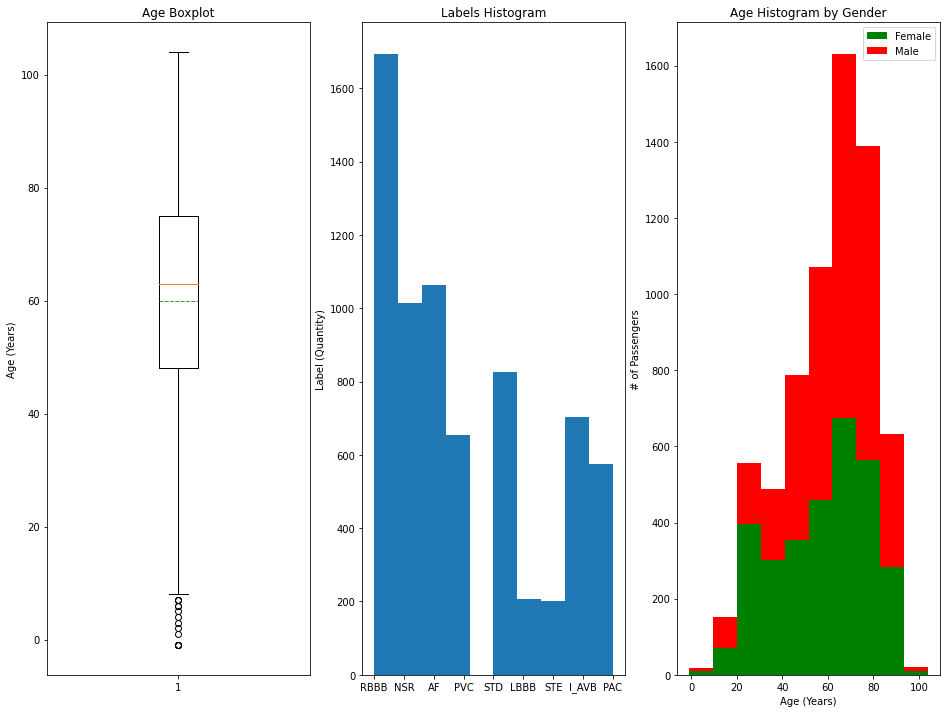

In [10]:
# check if array contains NaNs 
if ('True' in str(np.unique(np.isnan(age)))):
  age_temp = []
  ind_age_NaN = []
  [age_temp.append(a) for a in age if not np.isnan(a)]
  [ind_age_NaN.append(i) for i,a in enumerate(age) if np.isnan(a)]
  print('N Measurements have no age: '+ str(np.size(ind_age_NaN)))

 
ind_sex_NaN = [i for i,s in enumerate(sex)  if s=='[nan]']
print(ind_sex_NaN)

union = (set(ind_sex_NaN)).union(set(ind_age_NaN))
print(union)


# check features for outliers 
import matplotlib.pyplot as plt

plt.figure(figsize=[16,12])
plt.subplot(131)
plt.boxplot(age_temp, showmeans = True, meanline = True)
plt.title('Age Boxplot')
plt.ylabel('Age (Years)')



plt.subplot(132)
plt.hist(labels)
plt.title('Labels Histogram')
plt.ylabel('Label (Quantity)')


#plt.subplot(232)
female_ind = [i for i,s in enumerate(sex) if s=='Female']
male_ind = [i for i,s in enumerate(sex) if s=='Male']


plt.subplot(133)
plt.hist(x = [ [age[i] for i in female_ind], [age[i] for i in male_ind] ], 
         stacked=True, color = ['g','r'],label = ['Female','Male'])
plt.title('Age Histogram by Gender')
plt.xlabel('Age (Years)')
plt.ylabel('# of Passengers')
plt.legend()
  
  
  
# check features for outliers 
#for dataset in cardisio_measurements_DF__data_cleaner:    
#    #complete missing age with median
#    dataset['Age'].fillna(dataset['Age'].median(), inplace = True)

    #complete embarked with mode
 #   dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace = True)

    #complete missing fare with median
  #  dataset['Fare'].fillna(dataset['Fare'].median(), inplace = True)
    
#delete the cabin feature/column and others previously stated to exclude in train dataset
#drop_column = ['PassengerId','Cabin', 'Ticket']
#data1.drop(drop_column, axis=1, inplace = True)



#check features for correlations with personal parameters


#graph individual features by survival
#fig, saxis = plt.subplots(2, 3,figsize=(16,12))

#sns.barplot(x = 'Embarked', y = 'Survived', data=data1, ax = saxis[0,0])
#sns.barplot(x = 'Pclass', y = 'Survived', order=[1,2,3], data=data1, ax = saxis[0,1])
#sns.barplot(x = 'IsAlone', y = 'Survived', order=[1,0], data=data1, ax = saxis[0,2])

#sns.pointplot(x = 'FareBin', y = 'Survived',  data=data1, ax = saxis[1,0])
#sns.pointplot(x = 'AgeBin', y = 'Survived',  data=data1, ax = saxis[1,1])
#sns.pointplot(x = 'FamilySize', y = 'Survived', data=data1, ax = saxis[1,2])





NameError: ignored

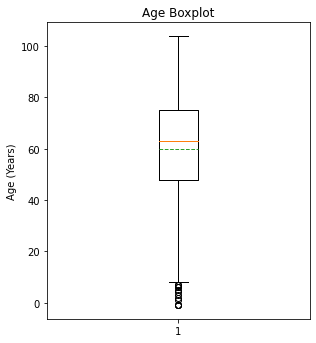

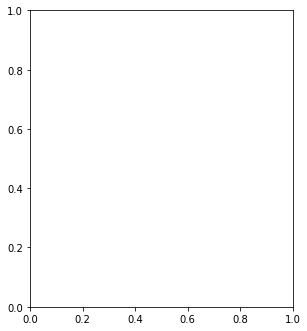

In [11]:
#IMPORTANT: Intentionally plotted different ways for learning purposes only. 

#optional plotting w/pandas: https://pandas.pydata.org/pandas-docs/stable/visualization.html

#we will use matplotlib.pyplot: https://matplotlib.org/api/pyplot_api.html

#to organize our graphics will use figure: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html#matplotlib.pyplot.figure
#subplot: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html#matplotlib.pyplot.subplot
#and subplotS: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html?highlight=matplotlib%20pyplot%20subplots#matplotlib.pyplot.subplots

#graph distribution of quantitative data
import matplotlib.pyplot as plt


plt.figure(figsize=[16,12])
plt.subplot(231)
plt.boxplot(age_temp, showmeans = True, meanline = True)
plt.title('Age Boxplot')
plt.ylabel('Age (Years)')


plt.figure(figsize=[16,12])
plt.subplot(232)
plt.hist(gender_temp)
plt.title('Age Boxplot')
plt.ylabel('Age (Years)')

#plt.subplot(232)
#plt.boxplot(sex, showmeans = True, meanline = True)
#plt.title('Sex Boxplot')
#plt.ylabel('Sex')

#plt.subplot(233)
#plt.boxplot(data1['FamilySize'], showmeans = True, meanline = True)
#plt.title('Family Size Boxplot')
#plt.ylabel('Family Size (#)')

#plt.subplot(234)
#plt.hist(x = [data1[data1['Survived']==1]['Fare'], data1[data1['Survived']==0]['Fare']], 
#         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
#plt.title('Fare Histogram by Survival')
#plt.xlabel('Fare ($)')
#plt.ylabel('# of Passengers')
#plt.legend()

#plt.subplot(235)
#plt.hist(x = [data1[data1['Survived']==1]['Age'], data1[data1['Survived']==0]['Age']], 
#         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
#plt.title('Age Histogram by Survival')
#plt.xlabel('Age (Years)')
#plt.ylabel('# of Passengers')
#plt.legend()

#plt.subplot(236)
#plt.hist(x = [data1[data1['Survived']==1]['FamilySize'], data1[data1['Survived']==0]['FamilySize']], 
#         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
#plt.title('Family Size Histogram by Survival')
#plt.xlabel('Family Size (#)')
#plt.ylabel('# of Passengers')
#plt.legend()
